In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Building a churn model to understand whether price sensitivity is the largest driver of churn has potential

- Historical customer data: Customer data such as usage, sign up date, forecasted usage etc
- Historical pricing data: variable and fixed pricing data
- Churn indicator: whether each customer has churned or not

These datasets are otherwise identical and have historical price data and customer data. 

## Exploratory Data Analysis & Data Cleaning
- [Loading data](#1)
  - Pandas Build-in functions
  - Dataframe sample display
  - Merging datasets
- [General statistics of datasets](#2)
  - Data Types
  - Data statistics
  - Mssing data
- [Data Visualization](#3)
  - Deep diving in specific parameters
  - Visualizing variable distribution
- [Data Cleaning](#4)
  - Missing data/Empty values
  - Duplicates
- [Format/Convert Data](#5)
  - Dates
  - Negative Data
  - Missing Data 
- [Saving the data in pickle](#6)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

pd.set_option('display.max_rows', None, 'display.max_columns', None)

%matplotlib inline
sns.set_theme(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

import os
import pickle

<a id='1'></a>
### 1. Loading data

![title](pic/data_glossary.png)

In [4]:
# loading data
features_raw = pd.read_csv('/content/drive/MyDrive/Forage/BCG-customer-churn/data/ml_case_training_data.csv')
churn_raw = pd.read_csv('/content/drive/MyDrive/Forage/BCG-customer-churn/data/ml_case_training_output.csv')
price_raw = pd.read_csv('/content/drive/MyDrive/Forage/BCG-customer-churn/data/ml_case_training_hist_data.csv')



In [5]:
# copying data
features = features_raw.copy()
churn = churn_raw. copy()
price = price_raw.copy()


In [6]:
# feature data display
features.head(2)


,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,2012-11-07,2015-11-09,NaN,NaN,NaN,NaN,26520.3,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,NaN,2015-06-23,NaN,NaN,NaN,NaN,0.0,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648


In [7]:
# churn data display
churn.head(2)


,id,churn
0,48ada52261e7cf58715202705a0451c9,0
1,24011ae4ebbe3035111d65fa7c15bc57,1


In [8]:
# price data display
price.head(2)


,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0


In [9]:
# merging feature data and churn data
# merge two dataframes
client = features.merge(churn, on = 'id')
client.head()


,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,2012-11-07,2015-11-09,NaN,NaN,NaN,NaN,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,NaN,2015-06-23,NaN,NaN,NaN,NaN,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,2009-08-21,2015-08-31,NaN,NaN,NaN,NaN,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,2010-04-16,2015-04-17,NaN,NaN,NaN,NaN,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,2010-03-30,2015-03-31,NaN,NaN,NaN,NaN,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0


<a id = '2'></a>
### 2. General statistics of datasets

#### Data Type
we look at the datatype of client, we could tell that there are four data related columns `date_activ`, `date_end`, `date_first_activ`, `date_modif_prod`, and `date_renewal` has the wrong datatype of object, we will convert these to datetime datetype later.

For the price dataset, the `price_date` has the wrong datatype as well, we will convert it later.

In [10]:
pd.DataFrame({'data_type': client.dtypes})


,data_type
id,object
activity_new,object
campaign_disc_ele,float64
channel_sales,object
cons_12m,int64
cons_gas_12m,int64
cons_last_month,int64
date_activ,object
date_end,object
date_first_activ,object


In [11]:
pd.DataFrame({'data_type': price.dtypes})


,data_type
id,object
price_date,object
price_p1_var,float64
price_p2_var,float64
price_p3_var,float64
price_p1_fix,float64
price_p2_fix,float64
price_p3_fix,float64


#### Data Statistics
For the client data, we obtain a lot of information about the dataset we are dealing with.
 - The minimum `consumption` and `forecasts` for electricity and gas (yearly and monthly) are negative. This could mean that the client comapnies are producing energy and therefore energy should be 'returned', although it is unlikly and we will consider it as corrupted data
 - The `campaign_disc_ele` is an empty column. We verify it by running. <br>
 <code>assert client.campaign_disc_ele.isnull().sum() == client.shape[0] </code>
 - Highly skewed data when we look at histplot

For the price data, it looks overall good. We might be consider that negative value on fix price columns. One more time, this might be corrupted data and we will change them to positive when cleaning the data.

In [14]:
assert client.campaign_disc_ele.isnull().sum() == client.shape[0]


In [15]:
client.describe()


,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,0.0,1.609600e+04,1.609600e+04,1.609600e+04,3508.000000,3508.000000,3508.000000,3508.000000,16096.000000,16096.000000,15970.000000,16096.000000,15970.000000,15970.000000,15970.000000,16096.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000,16096.000000
mean,NaN,1.948044e+05,3.191164e+04,1.946154e+04,335.843857,335.843857,3837.441866,206.845165,2370.555949,1907.347229,0.991547,70.309945,0.135901,0.052951,43.533496,196.123447,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131,0.099093
std,NaN,6.795151e+05,1.775885e+05,8.235676e+04,649.406000,649.406000,5425.744327,455.634288,4035.085664,5257.364759,5.160969,79.023251,0.026252,0.048617,5.212252,494.366979,23.700883,27.917349,1.459808,366.742030,1.676101,21.772421,0.298796
min,NaN,-1.252760e+05,-3.037000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,0.000000,-16689.260000,-85627.000000,0.000000,-242.960000,0.000000,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000,0.000000
25%,NaN,5.906250e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1158.175000,0.000000,513.230000,0.000000,0.000000,16.230000,0.115237,0.000000,40.606701,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000,0.000000
50%,NaN,1.533250e+04,0.000000e+00,9.010000e+02,162.955000,162.955000,2187.230000,42.215000,1179.160000,378.000000,0.000000,19.440000,0.142881,0.086163,44.311378,44.465000,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000,0.000000
75%,NaN,5.022150e+04,0.000000e+00,4.127000e+03,396.185000,396.185000,4246.555000,228.117500,2692.077500,1994.250000,0.000000,131.470000,0.146348,0.098837,44.311378,218.090000,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000,0.000000
max,NaN,1.609711e+07,4.188440e+06,4.538720e+06,12566.080000,12566.080000,81122.630000,9682.890000,103801.930000,175375.000000,50.000000,2411.690000,0.273963,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000,1.000000


In [16]:
price.describe()


,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000
mean,0.140991,0.054412,0.030712,43.325546,10.698201,6.455436
std,0.025117,0.050033,0.036335,5.437952,12.856046,7.782279
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


#### Missing data
we also conconered we have a lot of missing data so we can check how much of our data is missing

For client data, these are 6 columns having more than 75% of missing values. we will remove these columns from the dataset `campaign_disc_ele`, `date_first_activ`, `forecast_base_bill_ele	`, `forecast_base_bill_year`,`forecast_bill_12m`,`forecast_cons`.

The price data is qualified overall.

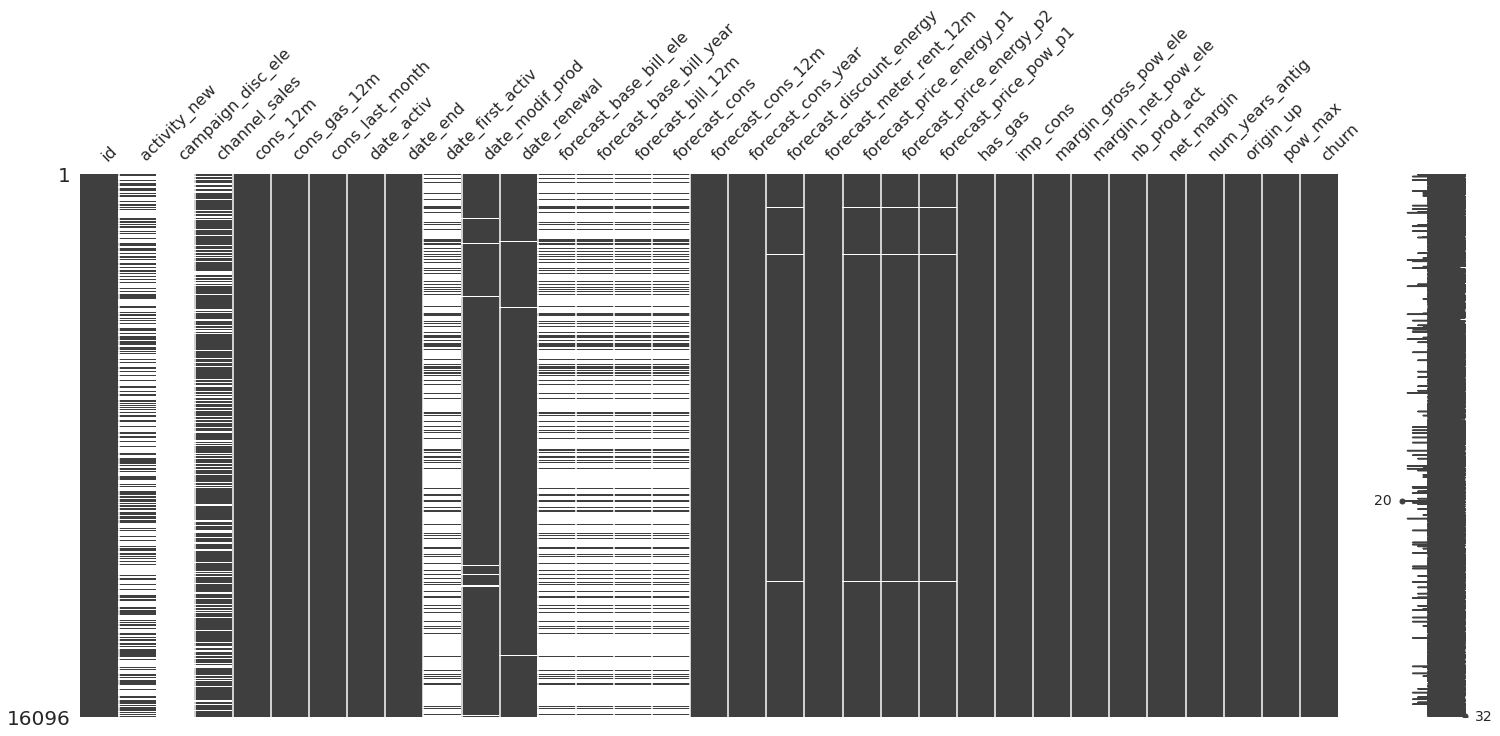

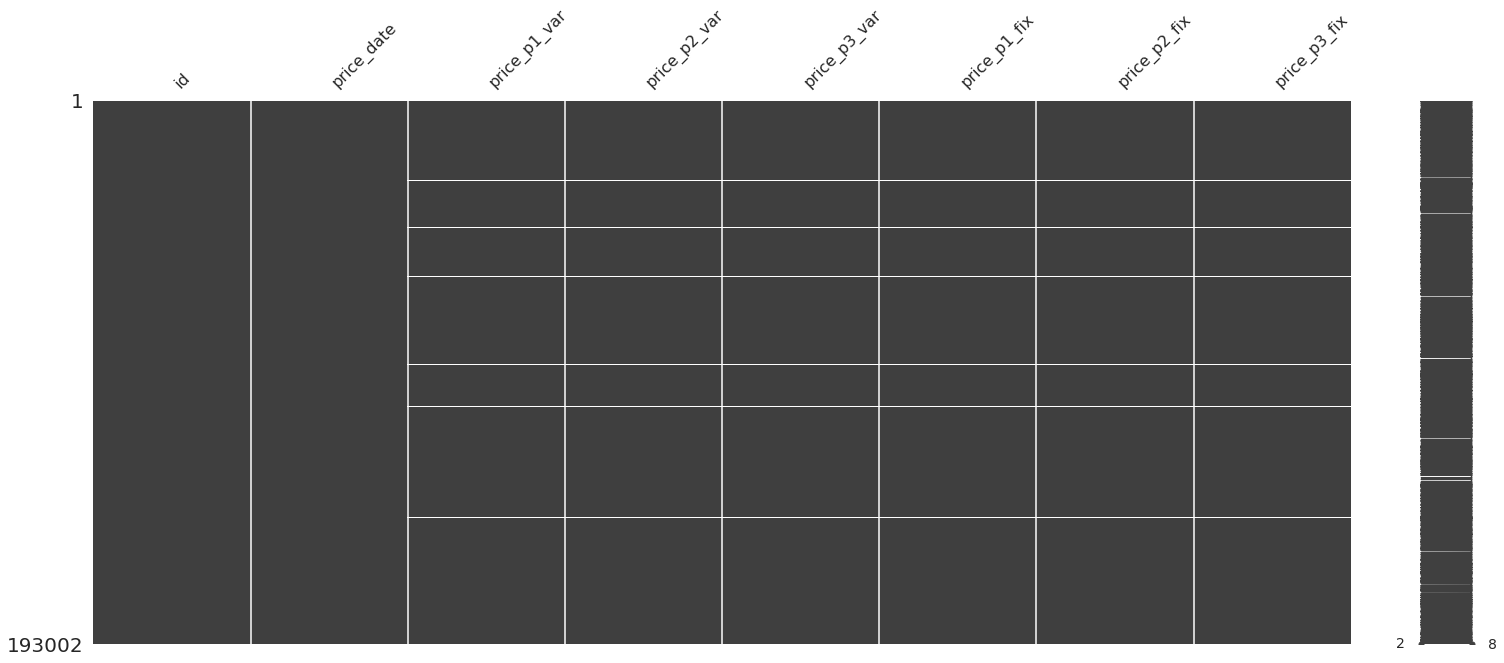

In [17]:
msno.matrix(client);
msno.matrix(price);



In [18]:
pd.DataFrame({'Data_Type' : (client.isnull().sum()/client.shape[0])*100})



,Data_Type
id,0.000000
activity_new,59.300447
campaign_disc_ele,100.000000
channel_sales,26.205268
cons_12m,0.000000
cons_gas_12m,0.000000
cons_last_month,0.000000
date_activ,0.000000
date_end,0.012425
date_first_activ,78.205765


In [19]:
pd.DataFrame({'Data_Type' : (price.isnull().sum()/price.shape[0])*100})





,Data_Type
id,0.000000
price_date,0.000000
price_p1_var,0.704138
price_p2_var,0.704138
price_p3_var,0.704138
price_p1_fix,0.704138
price_p2_fix,0.704138
price_p3_fix,0.704138


<a id = '3'></a>
### Data Visulization
Let's take deeper insight on some features.

#### Churn
About 10% of the of total customers have churned.

In [20]:
def plot_stacked_bars(df, title_, size_ = (18, 10), rot_ = 0, legend_ = 'upper right'):
    '''
    Plot stacked bars with annotations
    '''
    ax = df.plot(kind = 'bar',
                stacked = True,
                figsize = size_,
                rot = rot_,
                title = title_)
    # annotate bars
    annotate_stacked_bars(ax, textsize = 14)
    # rename legend
    plt.legend(['Retention', 'Churn'], loc=legend_)
    # labels
    plt.ylabel('Company base(%)')
    plt.show()
    
def annotate_stacked_bars(ax, pad = 0.99, colour = 'white', textsize = 13):
    '''
    Add Value annotations to the bar
    '''
    # Iterate over the plotted rectanges/bars 
    for p in ax.patches:
        # calculate annotation
        value = str(round(p.get_height(), 2))
        # if value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(value, ((p.get_x() + p.get_width()/2)*pad - 0.05, (p.get_y() + p.get_height()/2)*pad),
                   color = colour, size = textsize)
        

In [21]:
client_total = client.groupby(client['churn']).count()
client_perc = client_total/client_total.sum()*100
client_perc = client_perc[['id']].transpose()



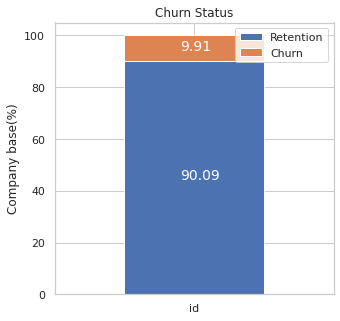

In [22]:
plot_stacked_bars(client_perc, 'Churn Status', (5, 5))



#### SME activity
Let's show the activity distribution of the companies as well as the sales channel.

Intuitively this might be an important predictive feature for energy consumption.

The distribution of the classes over the labeled data despite the lack of 60% of the entries

We see churn is not specifically related to any SME category in particular.

How will the SME activity influence our predictive model? <br>
> Our predictive modelis likely to struggle accurately predicting the SME activity due to the large number of categories and low number of companies belonging to each category.



In [23]:
churn_by_activity = client.groupby(['activity_new', 'churn'])['id']\
.count()\
.unstack(level = 1)\
.fillna(0)\
.sort_values(by = [0], ascending = False)


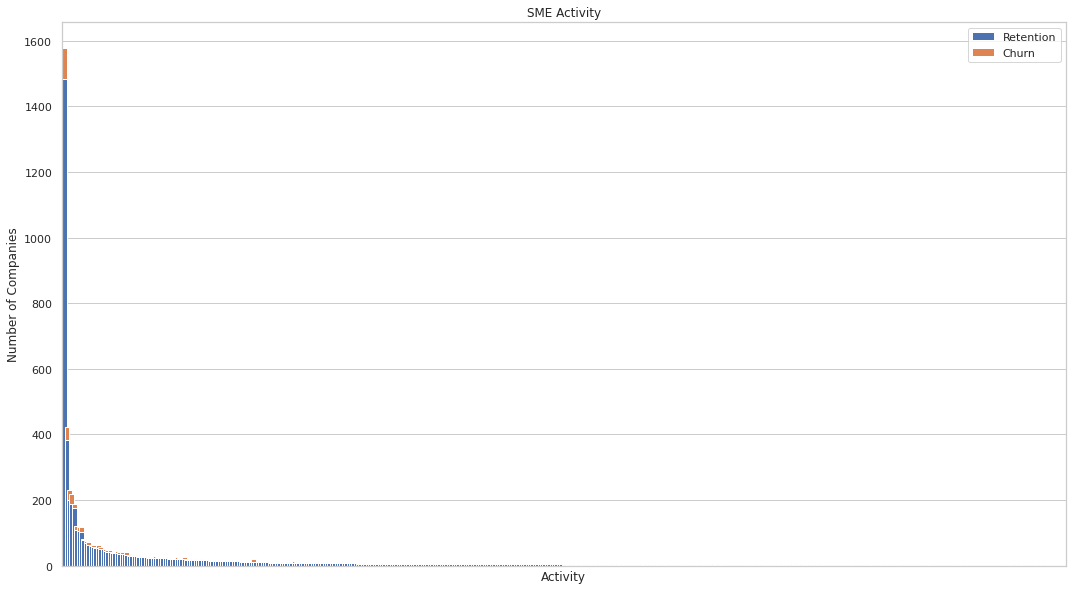

In [24]:
churn_by_activity.plot(kind = 'bar',
                      figsize = (18, 10),
                      width = 2,
                      stacked = True,
                      title = 'SME Activity');
# labels
plt.ylabel('Number of Companies')
plt.xlabel('Activity')
# rename legend
plt.legend(['Retention', 'Churn'], loc = 'upper right')
# Remove the label for the xticks as the categories are encoded and we cant draw any meaning from them yet
plt.xticks([])
plt.show();



In [25]:
# high churn rate by activity
churn_by_activity['total_companies'] = churn_by_activity[0] + churn_by_activity[1]
churn_by_activity['churn_rate'] = churn_by_activity[1]/churn_by_activity['total_companies']
top_churn_rate_by_activity = churn_by_activity\
.sort_values(by = 'churn_rate', ascending = False)[['churn_rate']]\
.head(10).reset_index()


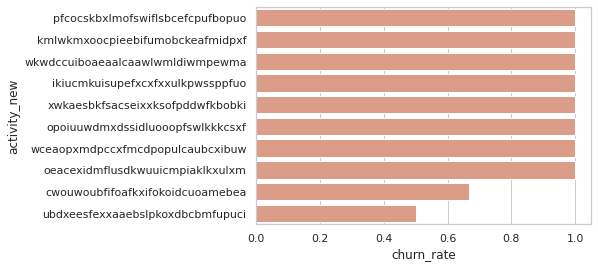

In [26]:
sns.barplot(data = top_churn_rate_by_activity, x = 'churn_rate', y = 'activity_new', color = '#E9967A');
plt.show();



#### Sales Channel
There are 7 different sale channel, but lack of 26.205268% entries.<br>
The sales channel seems to be an important feature when predicting the churning of a user. It is not the same if the sales were through email or telephone.<br>
We will plot the categories, despite the fact that data



In [27]:
churn_by_channel = client.groupby(['channel_sales', 'churn'])['id'].count().unstack(level = 1).fillna(0).sort_values(by = [0])
total = churn_by_channel[0] + churn_by_channel[1]
churn_by_channel[0] = churn_by_channel[0]/total*100
churn_by_channel[1] = churn_by_channel[1]/total*100

churn_by_channel = churn_by_channel.sort_values(by = [0], ascending = False)



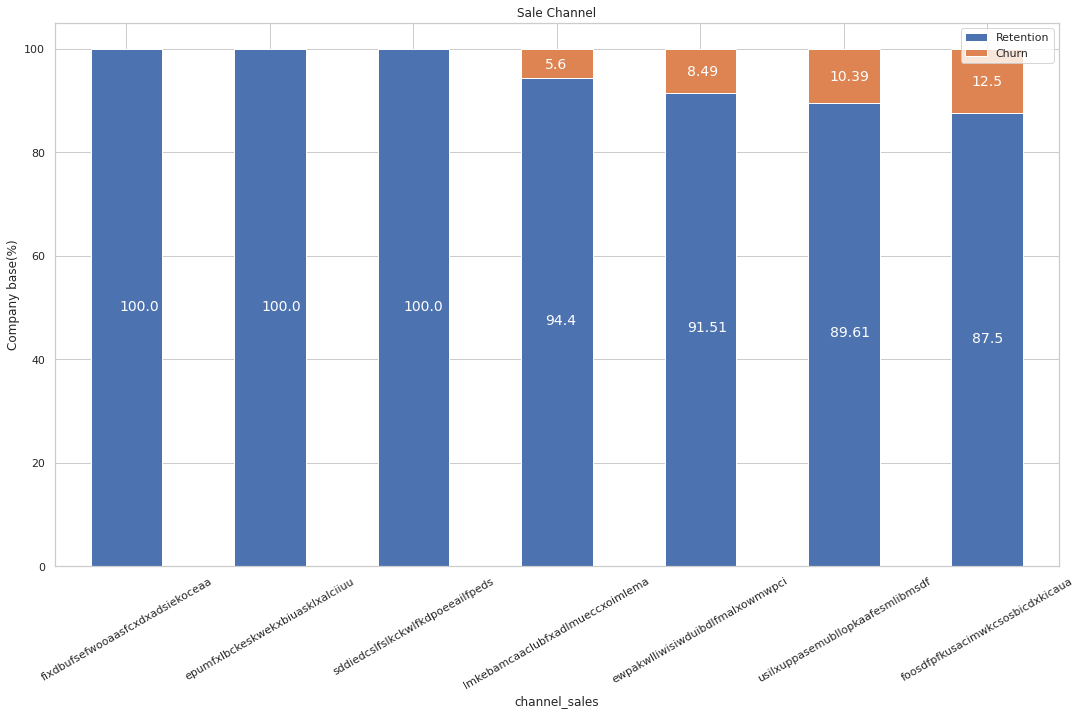

In [28]:
plot_stacked_bars(churn_by_channel, 'Sale Channel', rot_ = 30)



In [29]:
churn_by_channel['total'] = total
churn_by_channel



churn,0,1,total
channel_sales,,,
fixdbufsefwooaasfcxdxadsiekoceaa,100.000000,0.000000,2.0
epumfxlbckeskwekxbiuasklxalciiuu,100.000000,0.000000,4.0
sddiedcslfslkckwlfkdpoeeailfpeds,100.000000,0.000000,12.0
lmkebamcaaclubfxadlmueccxoimlema,94.404245,5.595755,2073.0
ewpakwlliwisiwduibdlfmalxowmwpci,91.511387,8.488613,966.0
usilxuppasemubllopkaafesmlibmsdf,89.612188,10.387812,1444.0
foosdfpfkusacimwkcsosbicdxkicaua,87.501694,12.498306,7377.0


#### Consumption
Let's see the distribution of the consumption over the year and over the month

We can clearly see in here that the consumption data is highly skewed to the right, presenting a very long right-tail towards the higher values of the distribution. The values on the higher end and lower end of the distribution of data based on a five number summary. It can tell us if our data is symmetrical, how tightly our data is grouped, and if and how data is skewed.

In [30]:
consumption = client[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'has_gas', 'imp_cons', 'churn']]




In [31]:
def plot_distribution(dataframe, column, ax, bins_ = 50):
    '''
    Plot variable distribution in a stcked histogram of churned or related company
    '''
    # create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({'Retention': dataframe[dataframe['churn'] == 0][column],
                        'Churn': dataframe[dataframe['churn'] == 1][column]})
    # plot the histogram
    temp[['Retention', 'Churn']].plot(kind = 'hist', bins = bins_, ax = ax, stacked = True)
    # X-axis label
    ax.set_xlabel(column)
    # change the x-axis to the plain style
    ax.ticklabel_format(style = 'plain', axis = 'x')

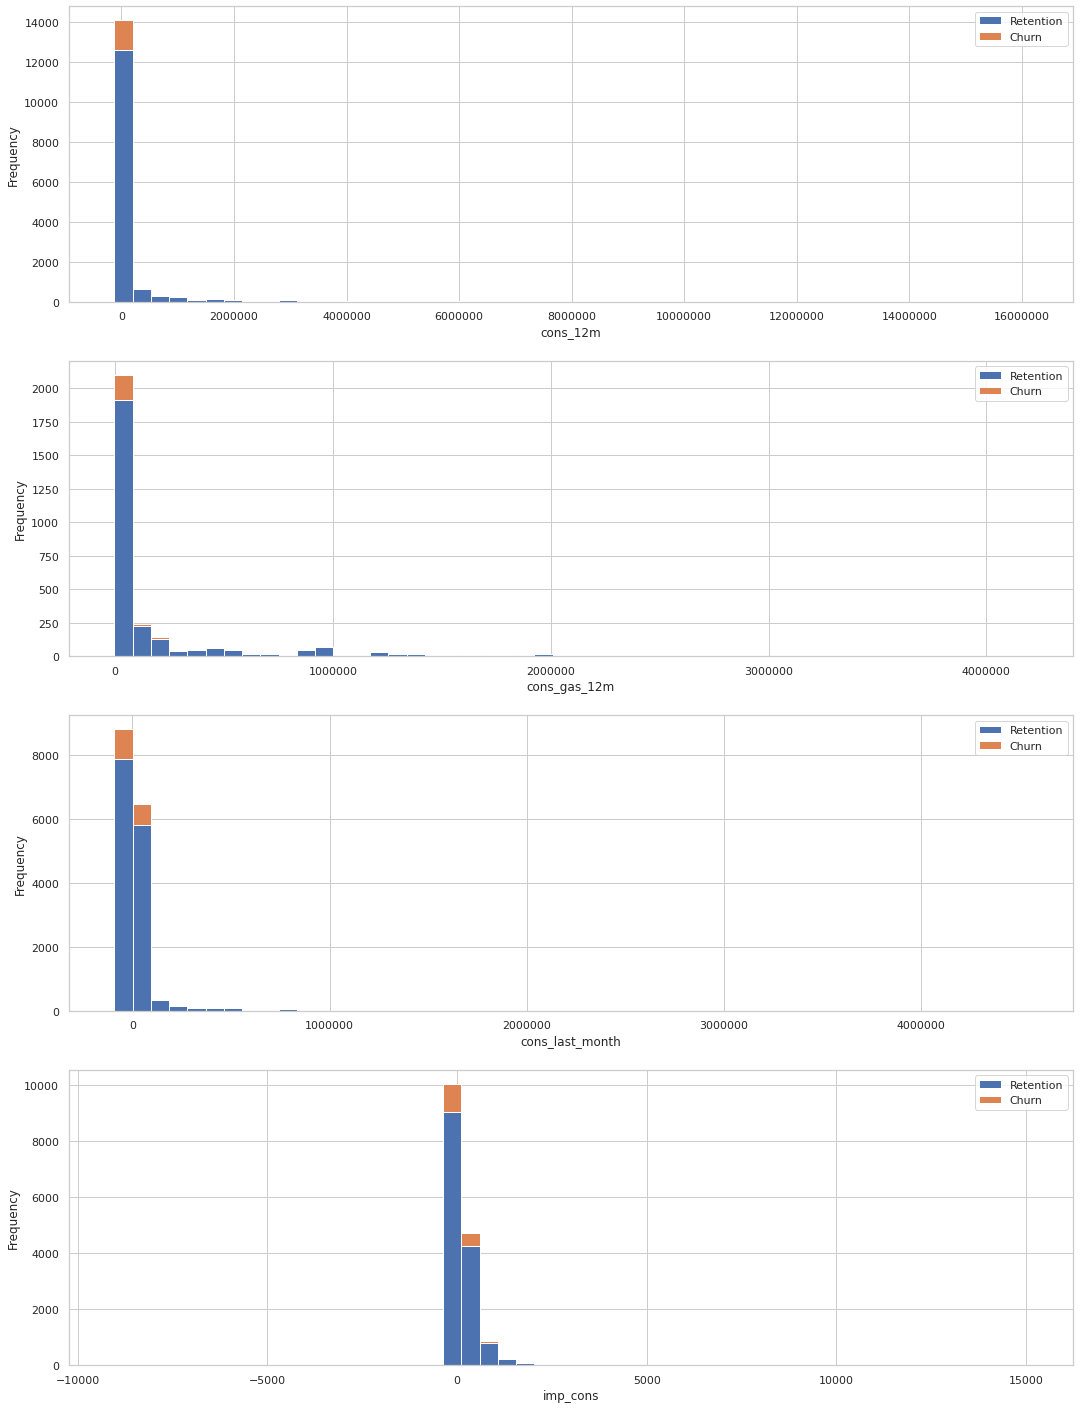

In [32]:
fig, axs = plt.subplots(nrows = 4, figsize = (18, 25))
# plot histogram 
plot_distribution(client, 'cons_12m', ax = axs[0])
# Note that the gas consumption must have gas contract
plot_distribution(client[client['has_gas'] == 't'], 'cons_gas_12m', ax = axs[1])
plot_distribution(client, 'cons_last_month', ax = axs[2])
plot_distribution(client, 'imp_cons', ax = axs[3])


It is very clear now that we have a highly skewed distribution, and several outliers. We will deal woth the skewness and outliers in the data cleaning.

(-2000.0, 20000.0)

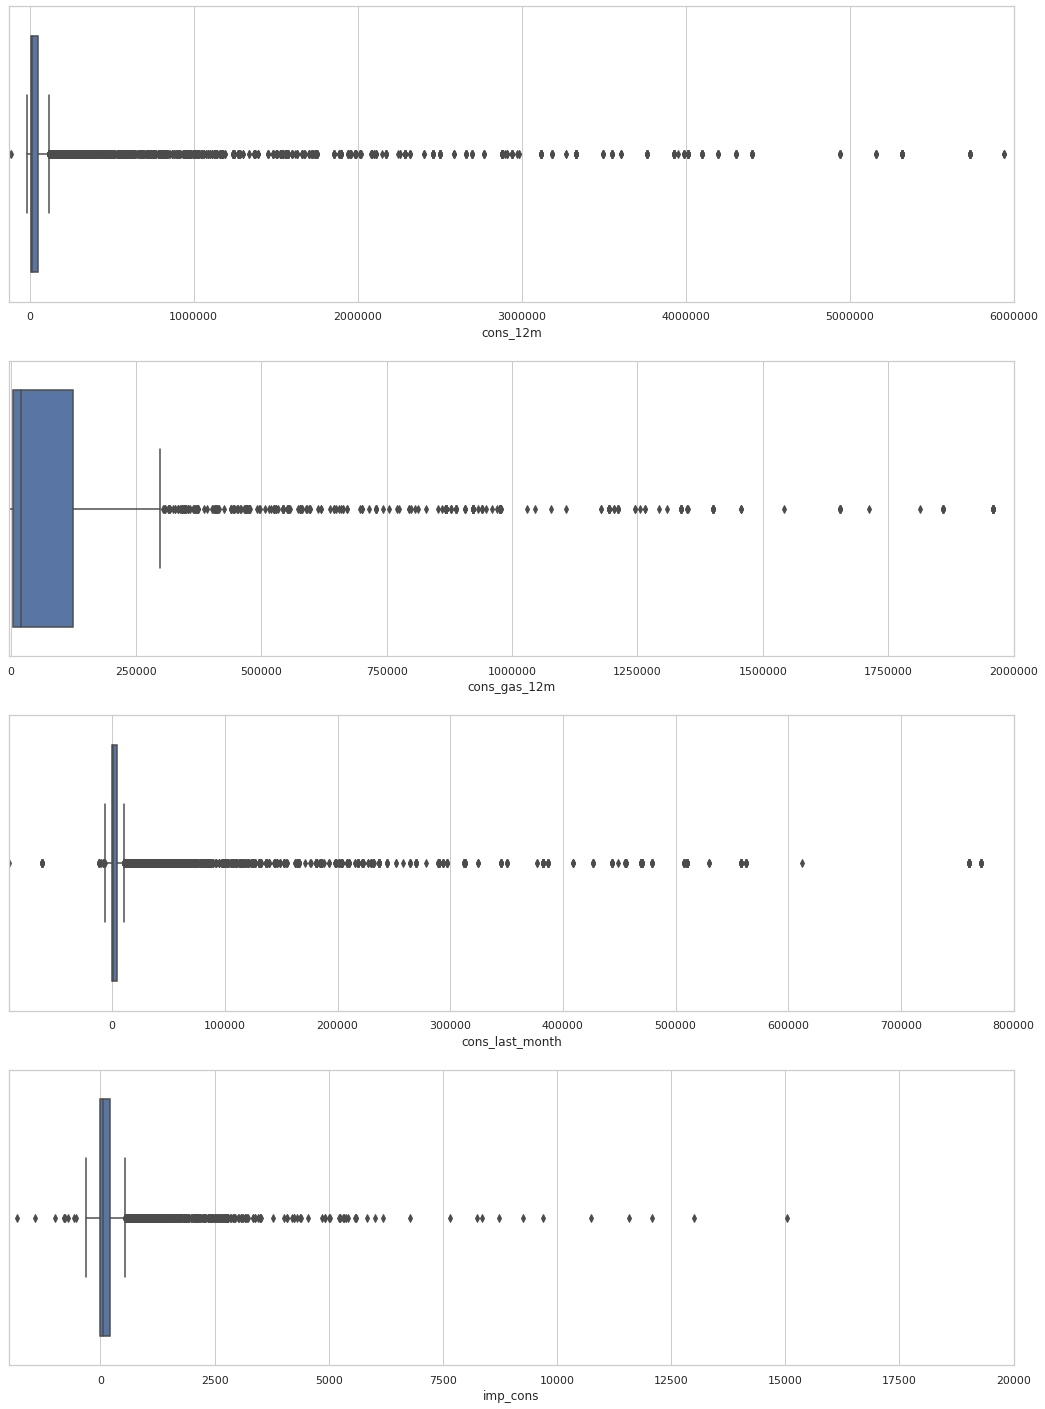

In [33]:
fig, axs = plt.subplots(nrows = 4, figsize = (18, 25))
# plot histogram
sns.boxplot(client['cons_12m'], ax = axs[0])
sns.boxplot(client[client['has_gas']=='t']['cons_gas_12m'], ax = axs[1])
sns.boxplot(client['cons_last_month'], ax = axs[2])
sns.boxplot(client['imp_cons'], ax = axs[3])

for ax in axs:
    ax.ticklabel_format(style = 'plain', axis = 'x')
# set x-axis limit
axs[0].set_xlim(-125276, 6000000)
axs[1].set_xlim(-3037, 2000000)
axs[2].set_xlim(-91386, 800000)
axs[3].set_xlim(-2000, 20000)




#### Dates
We look at some feature over time. 
First, we convert the date columns to the datetime datatype. 




In [34]:
client['date_activ'] = pd.to_datetime(client['date_activ'])
client['date_end'] = pd.to_datetime(client['date_end'])
client['date_first_activ'] = pd.to_datetime(client['date_first_activ'])
client['date_modif_prod'] = pd.to_datetime(client['date_modif_prod'])
client['date_renewal'] = pd.to_datetime(client['date_renewal'])

In [35]:
def plot_dates(dataframe, column, fontsize_ = 12):
    '''
    Plot monthly churn and retention distribution
    '''
    # group by month
    temp = dataframe\
    .groupby([pd.Grouper(key = column, freq = 'M'), 'churn'])['id']\
    .count()\
    .unstack(level = 1)\
    .fillna(0)
    ax = temp.plot(kind = 'bar', stacked = True, figsize = (18, 10), rot = 0);
    # change x-axis labels to months
    ax.set_xticklabels(map(lambda x: line_format(x), temp.index))
    # change xlabel size
    plt.xticks(fontsize = fontsize_)
    # rename y-axis
    plt.ylabel('Number of companies')
    # rename legend
    plt.legend(['Retention', 'Churn'], loc = 'upper right')
    plt.show()


def line_format(label):
    '''
    Convert time label to the format of pandas line plot
    '''
    month = label.month_name()[:1]
    if label.month_name() == 'January':
        month += f'\n{label.year}'
    return month
    

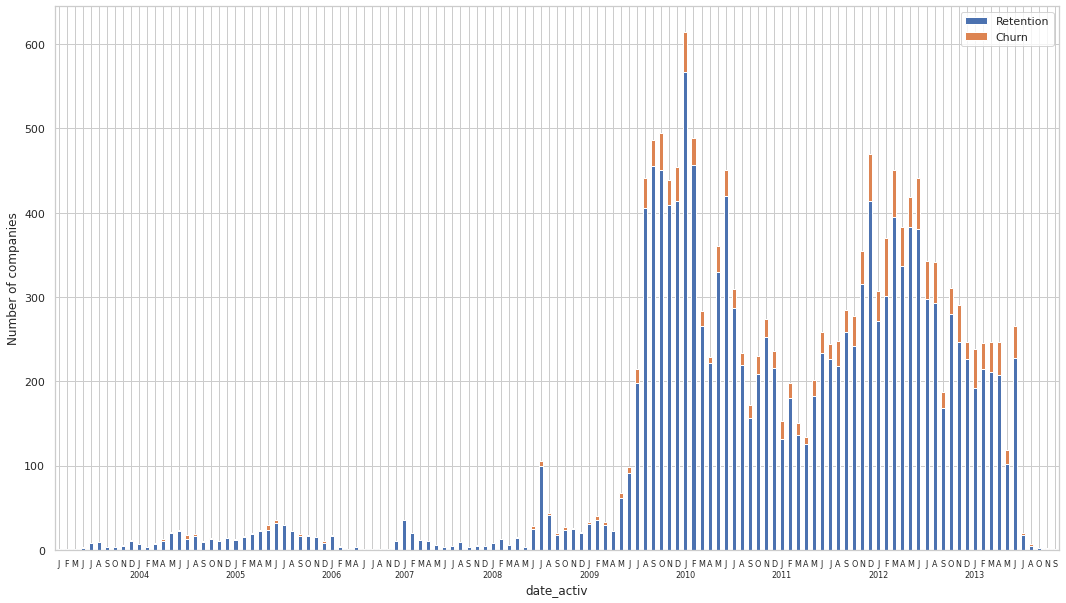

In [36]:
plot_dates(client,'date_activ', fontsize_ = 8);

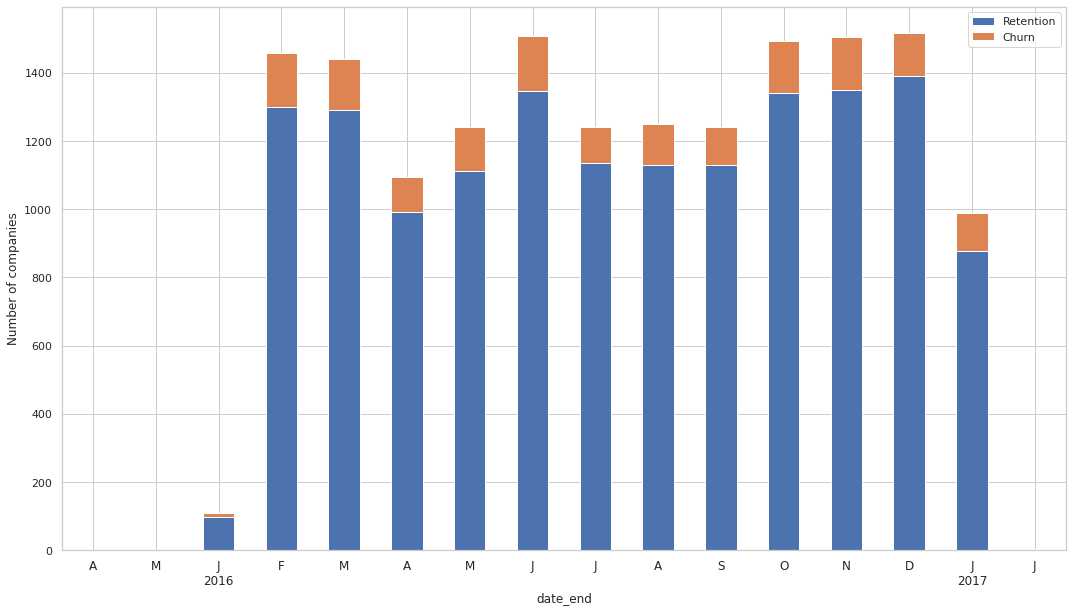

In [37]:
plot_dates(client,'date_end');

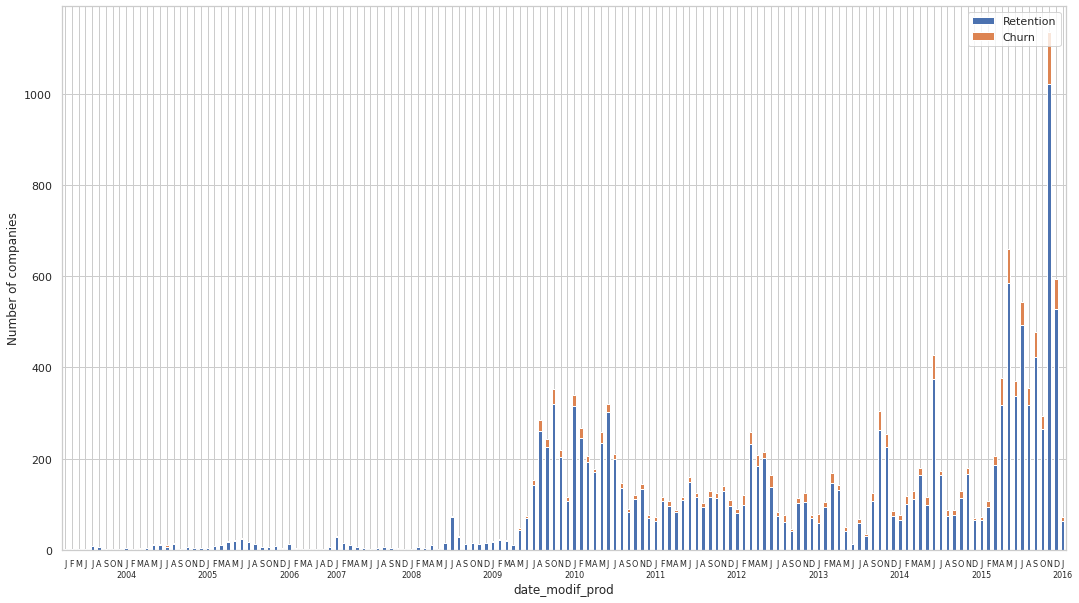

In [38]:
plot_dates(client, 'date_modif_prod', fontsize_ = 8)

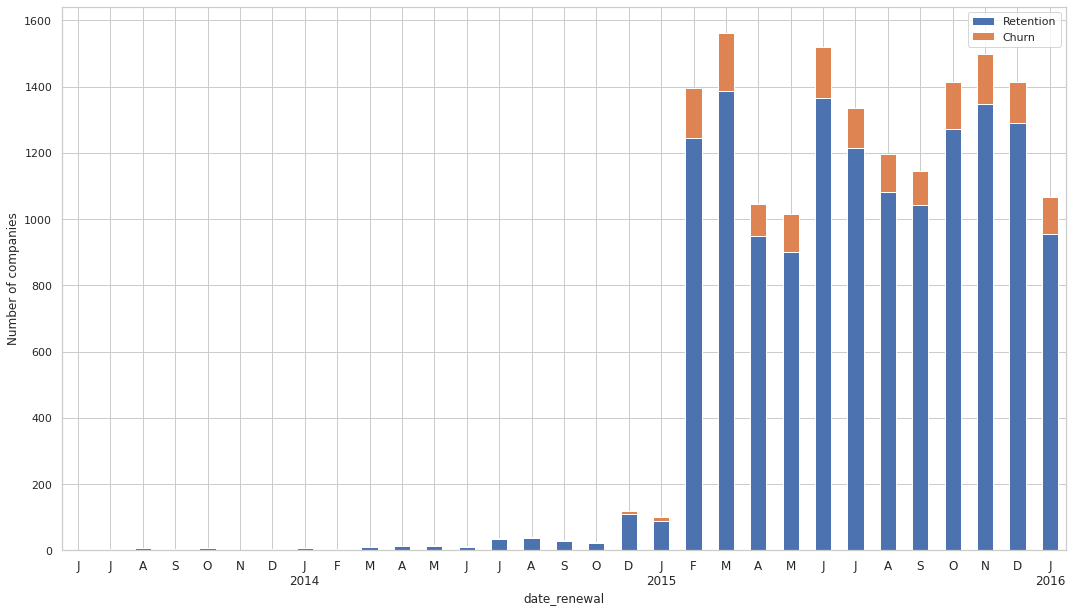

In [39]:
plot_dates(client, 'date_renewal')

#### Forecast
Similarly to the consumption plots, we can observe that a lot of the variables are highly skewed to the right, creating a very long tail on the higher values

We will make some transformations to correct for this skewness.


In [40]:
temp = client[[c for c in client if (c.startswith('forecast')) | (c == 'id') | (c == 'churn')]]

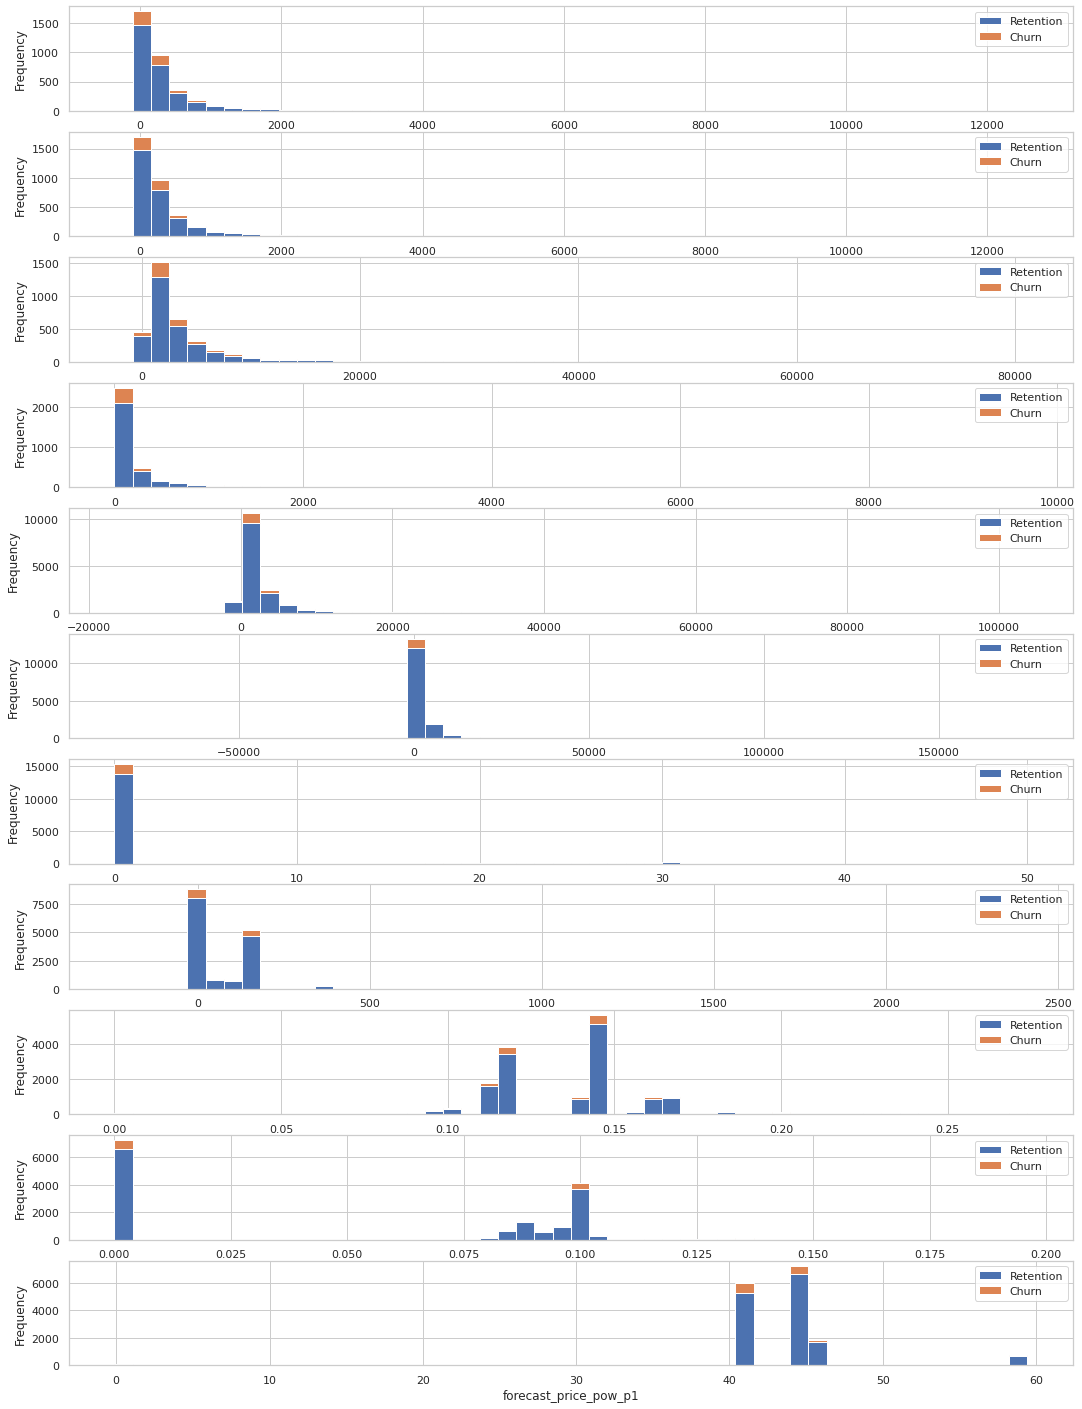

In [41]:
fig, axs = plt.subplots(nrows = 11, figsize = (18, 25))

for idx, c in enumerate(temp.columns[temp.columns.map(lambda x: x.startswith('forecast'))]):
    plot_distribution(temp, c, ax = axs[idx])

#plot_distribution(client, 'forecast_base_bill_ele', ax = axs[0])

#### Contact Types


In [42]:
temp = client.groupby(['has_gas', 'churn'])['id'].count()
temp2 = temp.groupby(level = 0).apply(lambda x: np.round(x/x.sum(), 2)).unstack(level = 1)

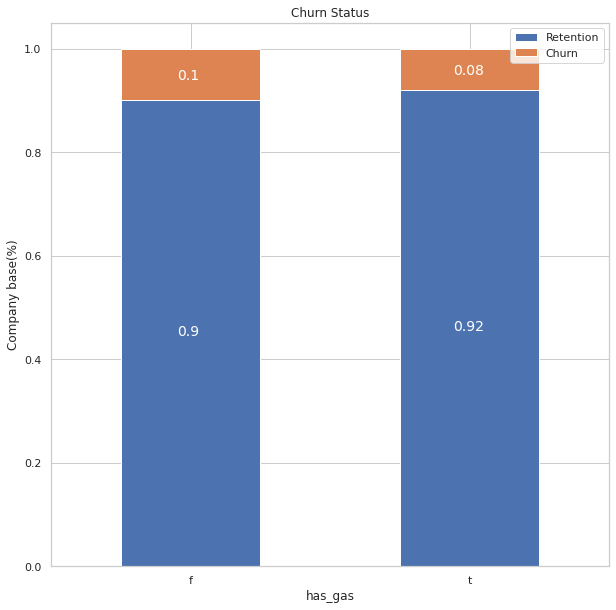

In [43]:
plot_stacked_bars(temp2, 'Churn Status', (10, 10))

#### Margins

Margin seems right skewed as well with a few outliers as well.

In [44]:
margin = client[['id', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin', 'churn']]

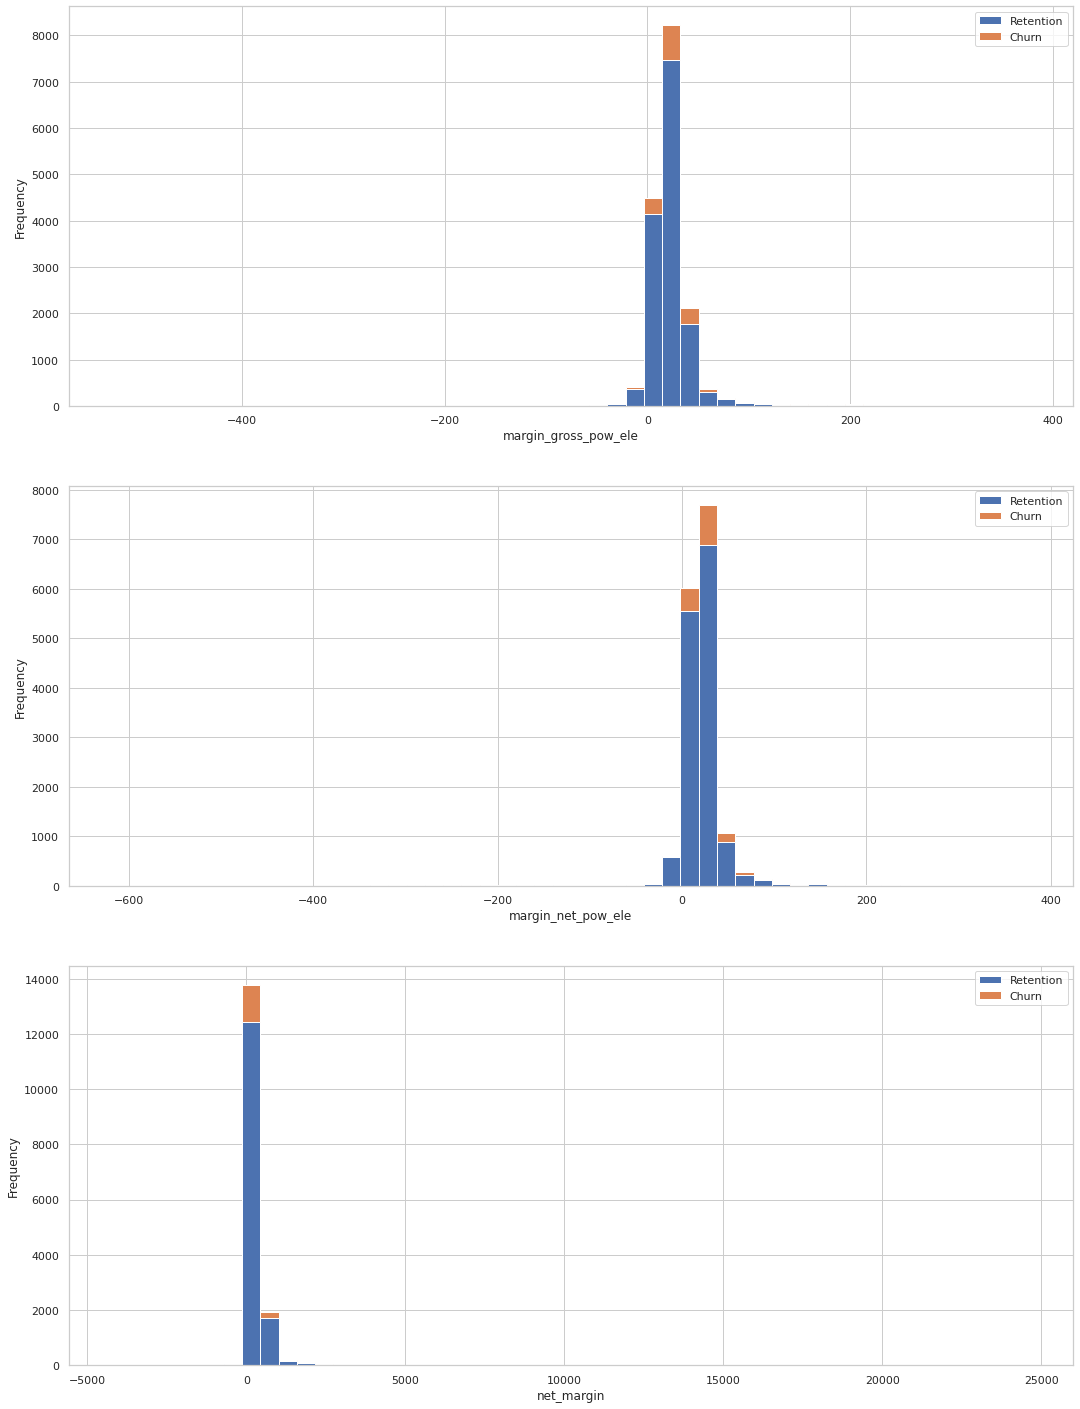

In [45]:
fig, axs = plt.subplots(nrows = 3, figsize = (18, 25))
plot_distribution(margin, 'margin_gross_pow_ele', axs[0])
plot_distribution(margin, 'margin_net_pow_ele', axs[1])
plot_distribution(margin, 'net_margin', axs[2])

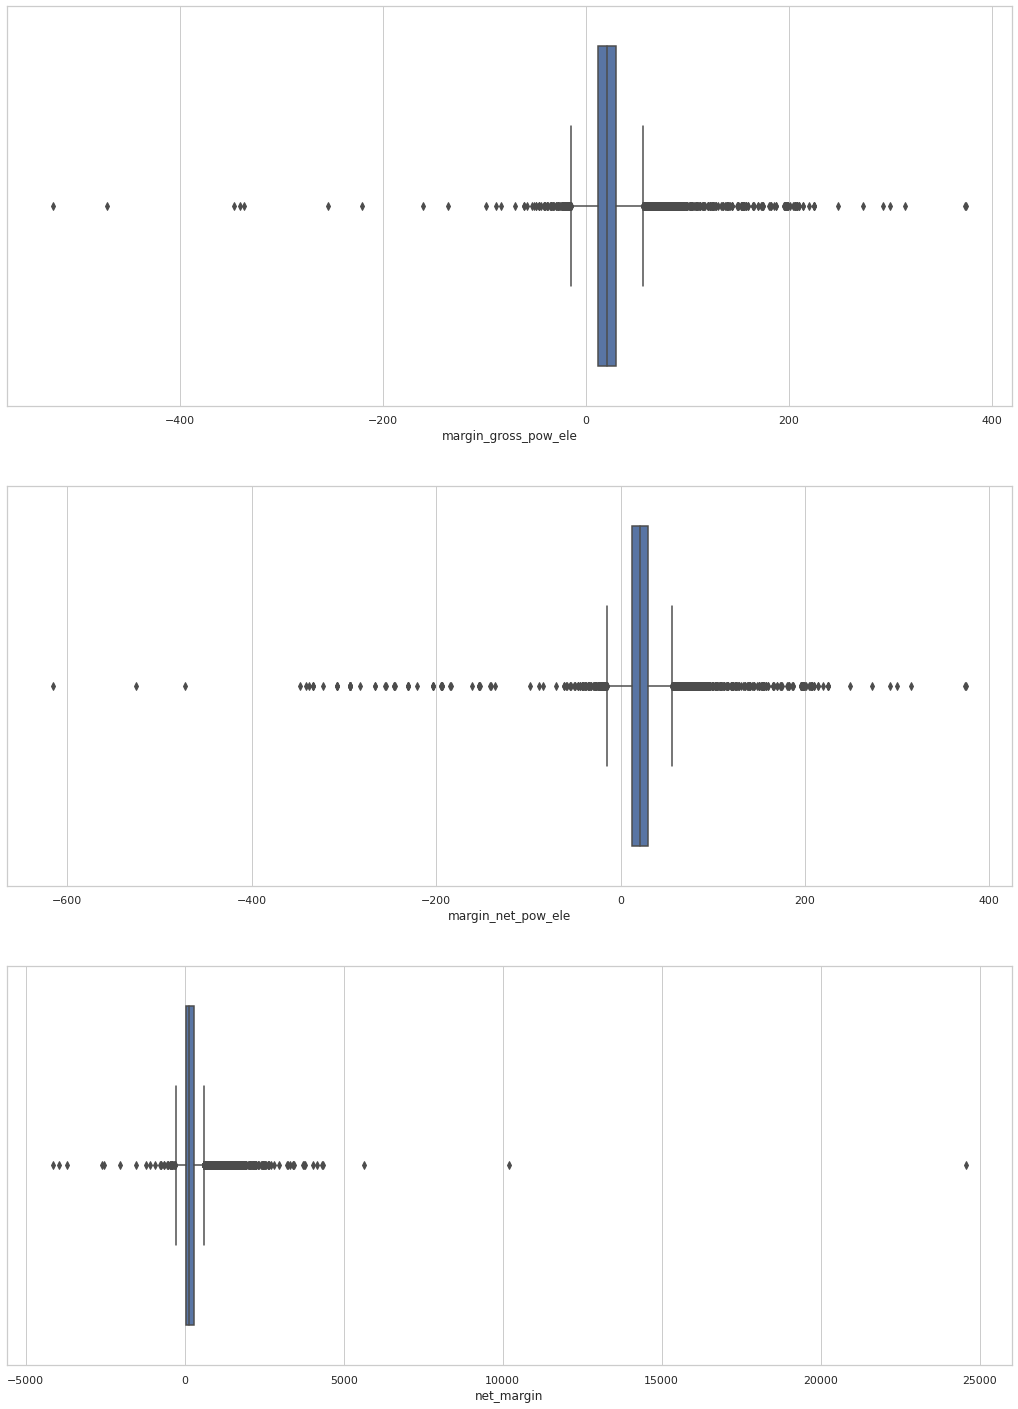

In [46]:
fig, axs = plt.subplots(nrows = 3, figsize = (18, 25))
sns.boxplot(margin['margin_gross_pow_ele'], ax = axs[0]);
sns.boxplot(margin['margin_net_pow_ele'], ax = axs[1]);
sns.boxplot(margin['net_margin'], ax = axs[2]);

#### Subscribed Power


In [47]:
power = client[['id', 'pow_max', 'churn']].fillna(0)

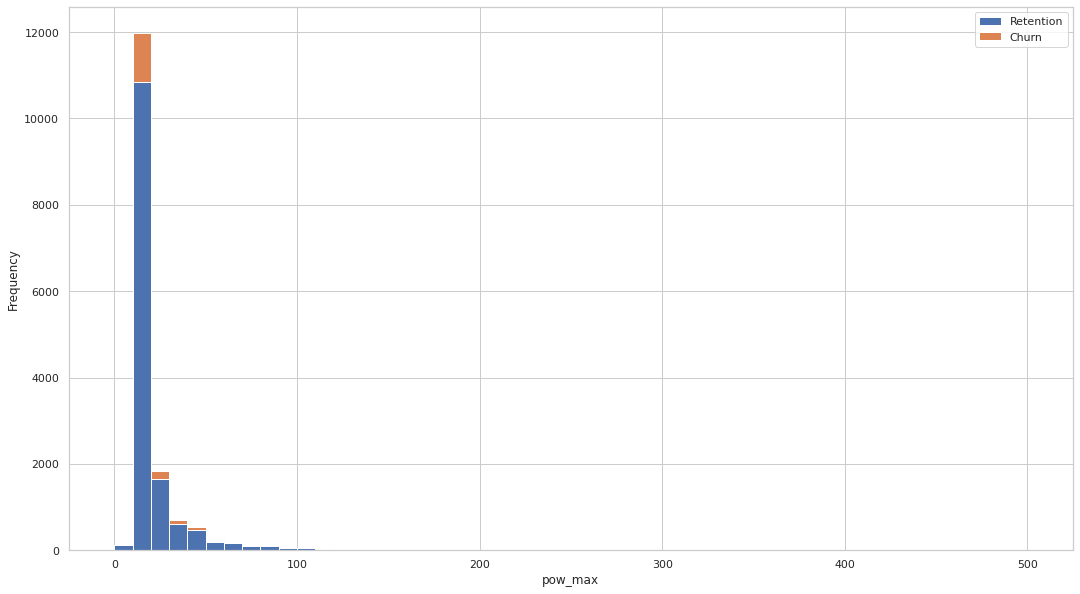

In [48]:
fig, axs = plt.subplots(nrows = 1, figsize = (18, 10))
plot_distribution(power, 'pow_max', axs);

#### Others

In [49]:
other = client[['id', 'nb_prod_act', 'num_years_antig', 'origin_up', 'churn']]

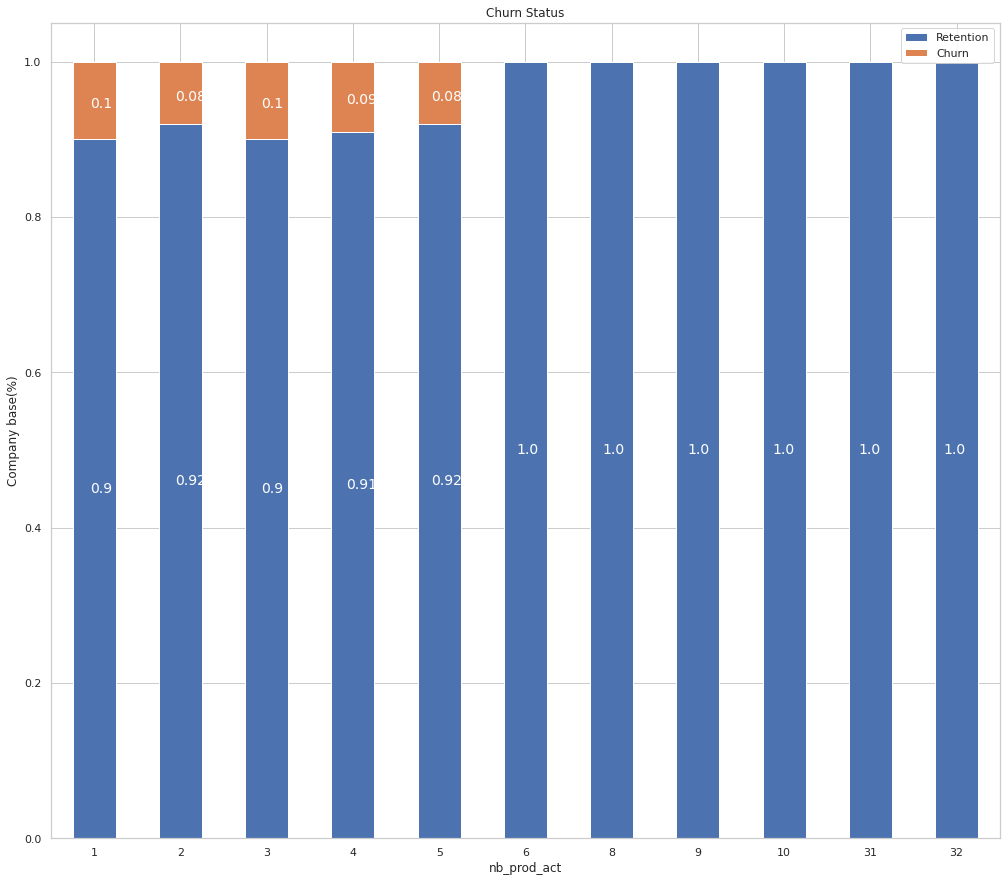

In [50]:
nb_prod_act = other.groupby(['nb_prod_act', 'churn'])['id'].count()
nb_prod_act = nb_prod_act.groupby(level = 0).apply(lambda x: np.round(x/x.sum(), 2)).unstack(level = 1)
plot_stacked_bars(nb_prod_act, 'Churn Status', (17, 15))

<a id='4'></a>
### 4. Data Cleaning
For simplicity we will remove the variables with more than 60% of the values missing.
'We might re-use some of these variables if our model is not good enough'.

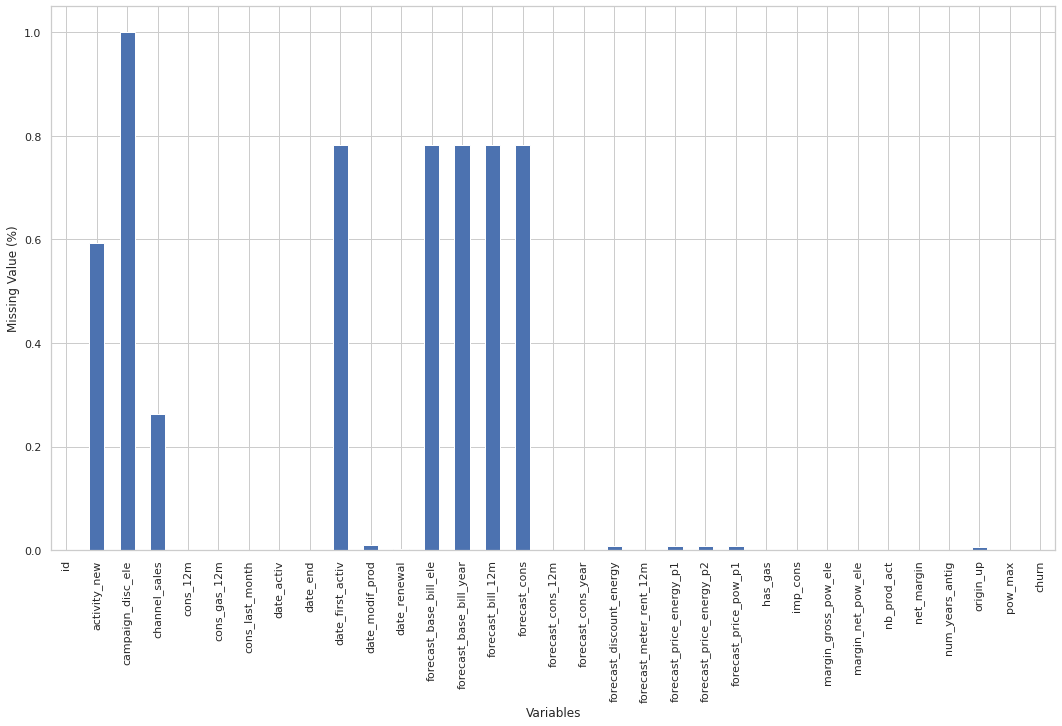

In [51]:
(client.isnull().sum()/client.shape[0]).plot(kind = 'bar', figsize = (18, 10));
plt.xlabel('Variables')
plt.ylabel('Missing Value (%)')
plt.show();

In [52]:
client_low_missing = client[client.columns[client.apply(lambda x: (x.isnull().sum()/client.shape[0]) < 0.6)]]

In [53]:
pd.DataFrame({'dtype': client_low_missing.dtypes, 'missing_perc': client_low_missing.apply(lambda x: (100*x.isnull().sum()/client_low_missing.shape[0]))})

,dtype,missing_perc
id,object,0.000000
activity_new,object,59.300447
channel_sales,object,26.205268
cons_12m,int64,0.000000
cons_gas_12m,int64,0.000000
cons_last_month,int64,0.000000
date_activ,datetime64[ns],0.000000
date_end,datetime64[ns],0.012425
date_modif_prod,datetime64[ns],0.975398
date_renewal,datetime64[ns],0.248509


#### Duplicates
We want to make sure all the data we have is unique and we doont have any duplicates rows. 

In [54]:
client_low_missing[client_low_missing.duplicated()]

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn


<a id='5'></a>
### 5. Formatting Data
#### Missing dates
These could be several ways in which we could deal with missing dates.<br>
One way, we could 'engineer' the dates from known values. For example, the `date_renewal` is usually the same date as the `date_modif_prod` but one year ahead.<br>
The simplest way, we will replace the missing values with the median (the frequent date). For numerical values, the built-in function `.median()` can be used, but will not work for dates or strings, so we will use a workaroound using `.value_counts()`

>Althoough we are directly the values in here, it is usually best practice to make a binary flag that indicates when data is missing because this is informative in itself.

In [55]:
client_low_missing.loc[client_low_missing['date_modif_prod'].isnull(), 'date_modif_prod'] = client_low_missing['date_modif_prod']\
.value_counts()\
.index[0]

client_low_missing.loc[client_low_missing['date_end'].isnull(), 'date_end'] = client_low_missing['date_end']\
.value_counts()\
.index[0]

client_low_missing.loc[client_low_missing['date_renewal'].isnull(), 'date_renewal'] = client_low_missing['date_renewal']\
.value_counts()\
.index[0]

#### Missing data
We might have some prices missing for soome companies and months


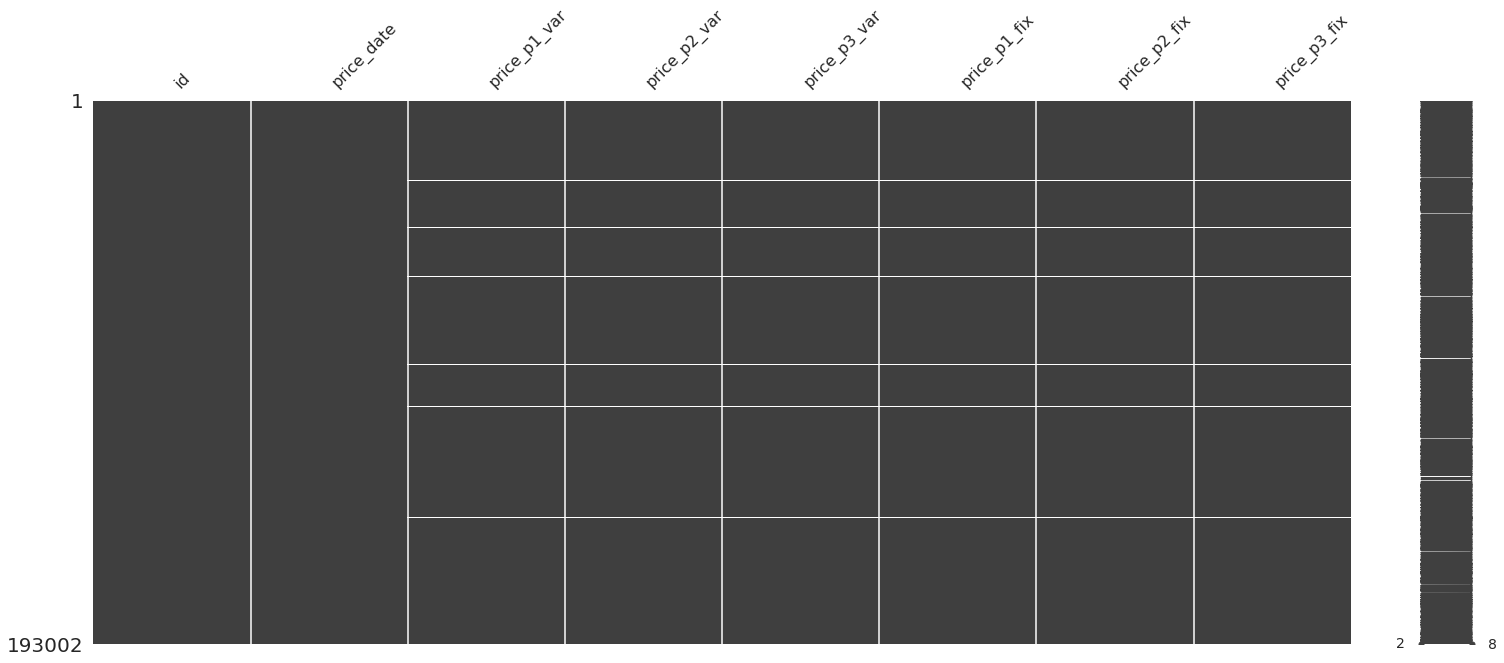

In [56]:
msno.matrix(price);

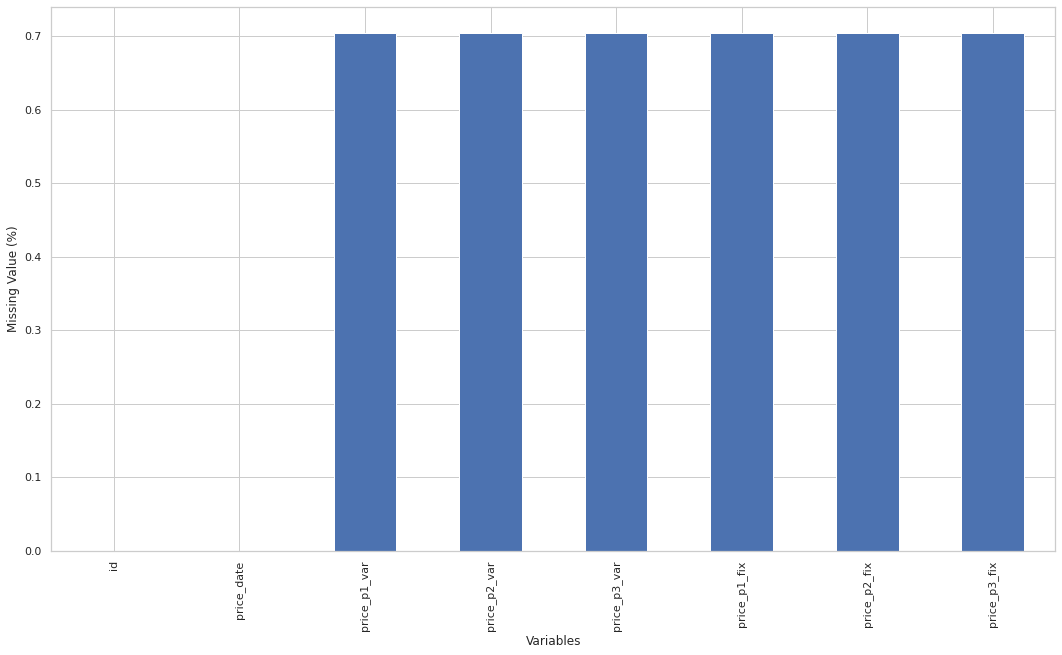

In [57]:
(100*price.isnull().sum()/price.shape[0]).plot(kind = 'bar', figsize = (18, 10));
plt.xlabel('Variables')
plt.ylabel('Missing Value (%)')
plt.show();

In [58]:
price.loc[price['price_p1_var'].isnull(), 'price_p1_var'] = price['price_p1_var'].median()
price.loc[price['price_p2_var'].isnull(), 'price_p2_var'] = price['price_p2_var'].median()
price.loc[price['price_p3_var'].isnull(), 'price_p3_var'] = price['price_p3_var'].median()
price.loc[price['price_p1_fix'].isnull(), 'price_p1_fix'] = price['price_p1_fix'].median()
price.loc[price['price_p2_fix'].isnull(), 'price_p2_fix'] = price['price_p2_fix'].median()
price.loc[price['price_p3_fix'].isnull(), 'price_p3_fix'] = price['price_p3_fix'].median()


#### Formating dates (history prrice)


In [59]:
price['price_date'] = pd.to_datetime(price['price_date'])

#### Negative Data
let's take a look at the historical price data

We can see that there are neagtive values forr `price_p1_fix`, `price_p2_fix`, `price_p3_fix`.<br>
Further exploring on those we can see there are only about 10 entries which are negative. This is more likely to be due to corrputed data rather than a 'price' discount.
 We will replace the negtive values with medium

In [60]:
price.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.332175,10.622871,6.409981
std,0.025032,0.049924,0.036298,5.419345,12.841899,7.773595
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [61]:
price[(price.price_p1_fix < 0) |(price.price_p2_fix < 0) | (price.price_p3_fix < 0)]

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
23138,951d99fe07ca94c2139f43bc37095139,2015-03-01,0.125976,0.103395,0.071536,-0.162916,-0.097749,-0.065166
28350,f7bdc6fa1067cd26fd80bfb9f3fca28f,2015-03-01,0.131032,0.108896,0.076955,-0.162916,-0.097749,-0.065166
98575,9b523ad5ba8aa2e524dcda5b3d54dab2,2015-02-01,0.129444,0.106863,0.075004,-0.162916,-0.097749,-0.065166
113467,cfd098ee6c567eb32374c77d20571bc7,2015-02-01,0.123086,0.100505,0.068646,-0.162916,-0.097749,-0.065166
118467,51d7d8a0bf6b8bd94f8c1de7942c66ea,2015-07-01,0.128132,0.105996,0.074056,-0.162912,-0.097752,-0.065172
125819,decc0a647016e183ded972595cd2b9fb,2015-03-01,0.124937,0.102814,0.069071,-0.162916,-0.097749,-0.065166
128761,cc214d7c05de3ee17a7691e274ac488e,2015-06-01,0.124675,0.102539,0.070596,-0.162912,-0.097752,-0.065172
141011,2a4ed325054472e03cdcc9a34693be4b,2015-02-01,0.167317,0.083347,0.000000,-0.177779,0.000000,0.000000
160827,395a6f41bbd1a0f23a64f00645264e78,2015-04-01,0.121352,0.098771,0.066912,-0.162916,-0.097749,-0.065166
181811,d4a84ff4ec620151ef05bdef0cf27eab,2015-05-01,0.125976,0.103395,0.071536,-0.162916,-0.097749,-0.065166


In [62]:
price.loc[price['price_p1_fix'] < 0, 'price_p1_fix'] = price['price_p1_fix'].median()
price.loc[price['price_p2_fix'] < 0, 'price_p2_fix'] = price['price_p2_fix'].median()
price.loc[price['price_p3_fix'] < 0, 'price_p3_fix'] = price['price_p3_fix'].median()


<a id = '6'> </a>
### 6 Pickling
save the data


In [63]:
price.head(2)

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0


In [64]:
client_low_missing.head()

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
3,764c75f661154dac3a6c254cd082ea7d,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
4,bba03439a292a1e166f80264c16191cb,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0


In [65]:
if not os.path.exists(os.path.join('../BCG', 'processed_data')):
    os.makedirs(os.path.join('../BCG', 'processed_data'))

In [66]:
pickle_train_dir = os.path.join('../BCG', 'processed_data', 'client_low_missing.pkl')
pickle_history_dir = os.path.join('../BCG', 'processed_data', 'history_price.pkl')

In [67]:
pd.to_pickle(client_low_missing, pickle_train_dir)
pd.to_pickle(price, pickle_history_dir)